# Analyse model predictions

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def load_predictions(root_dir, pred_file):
    preds = pd.read_csv(os.path.join(root_dir, pred_file), delimiter="\t")
    # I have no clue how the parascore is above 1 in a few cases, lets just clip it :o
    preds.loc[preds["parascore-ref-based"] > 1, "parascore-ref-based"] = 1
    preds.loc[preds["parascore-ref-free"] > 1, "parascore-ref-free"] = 1
    return preds
    
preds = load_predictions("./results", "predictions_aug.csv")    
preds.head()

,in_text,truth,pred,parascore-ref-based,parascore-ref-free
0,Frey je v 80-ih letih dosegel solo uspeh.,Frey je v osemdesetih letih dosegel solistični uspeh.,V osemdesetih letih je Frey dosegel tudi solistični uspeh.,0.957258,0.818200
1,Frey je v 80-ih letih dosegel solo uspeh.,Frey je v osemdesetih letih dosegel solistični uspeh.,V 80-ih letih je Frey dosegel tudi solistični uspeh.,0.916337,0.890555
2,"Kaj bodo naredili nadzorniki, pa je po njenih besedah njihova stvar.","Po njenih besedah je odvisno od nadzornikov, kaj bodo storili.","Po njenih besedah je odvisno od regulatorjev, kaj bodo storili.",0.908174,0.709383
3,"Kaj bodo naredili nadzorniki, pa je po njenih besedah njihova stvar.","Po njenih besedah je odvisno od nadzornikov, kaj bodo storili.","Po njenih besedah je odvisno od regulatorjev, kaj bodo naredili.",0.885676,0.731723
4,"Domnevali so, da sta z mostu skočila skupaj in zvezana, vendar je obdukcija pokazala, da njuni trupli nista imeli znakov poškodb pri skoku s takšne višine, zato ju zdaj sumijo, da sta bili žrtvi kaznivega dejanja.","Sklepali so, da sta tako skupaj zvezani skočili z mostu, a je obdukcija pokazala, da na njunih telesih ni znakov poškodb, ki bi jih utrpeli ob skoku s takšne višine, zato zdaj sumijo, da sta bili žrtvi kaznivega dejanja.","Domnevali so, da sta z mostu skočila povezana, vendar je obdukcija pokazala, da na njunih telesih ni bilo znakov poškodb zaradi skoka s takšne višine, zato ju zdaj sumijo, da sta bila žrtvi kaznivega dejanja.",0.885092,0.885634


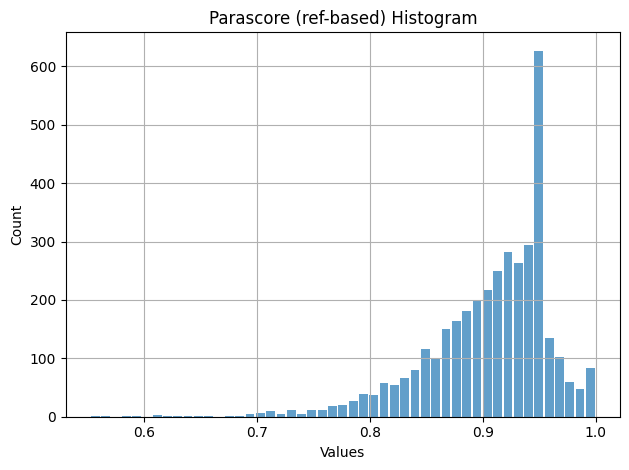

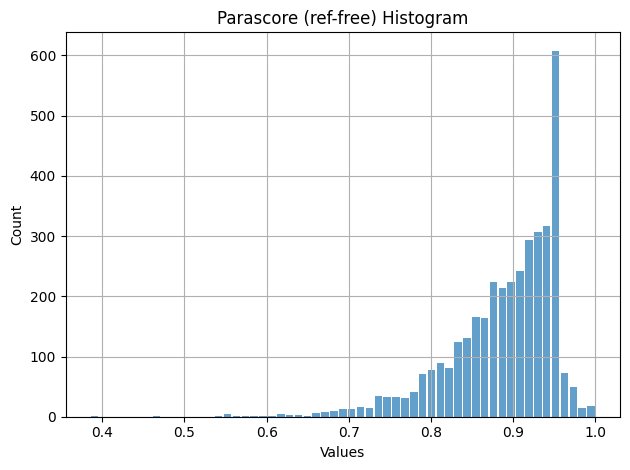

In [25]:
def plot_parascore_hists(preds):
    # Plotting a histogram
    plt.hist(preds["parascore-ref-based"], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title('Parascore (ref-based) Histogram')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./img/parascore-ref-based-hist.pdf")
    plt.show()
                
    # Plotting a histogram
    plt.hist(preds["parascore-ref-free"], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title('Parascore (ref-free) Histogram')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./img/parascore-ref-free-hist.pdf")
    plt.show()
    
plot_parascore_hists(preds)

[0.94999994 0.95       0.95000012]


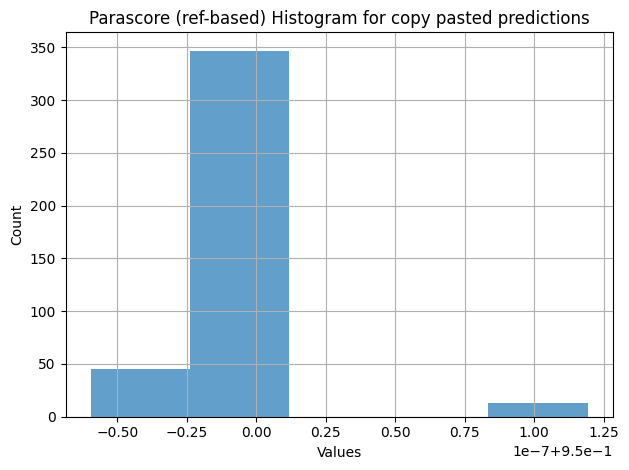

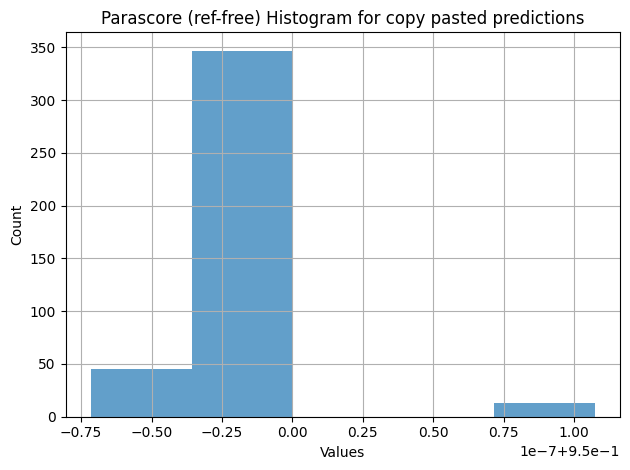

In [26]:
copy_preds = preds[preds.in_text == preds.pred]

print(np.unique(copy_preds["parascore-ref-based"]))
plt.hist(copy_preds["parascore-ref-based"], bins=5, alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Parascore (ref-based) Histogram for copy pasted predictions')
plt.grid(True)
plt.tight_layout()
plt.savefig("./img/t5-base-copy-preds-parascore-ref-based-hist.pdf")
plt.show()

plt.hist(copy_preds["parascore-ref-free"], bins=5, alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Parascore (ref-free) Histogram for copy pasted predictions')
plt.grid(True)
plt.tight_layout()
plt.savefig("./img/t5-base-copy-preds-parascore-ref-free-hist.pdf")
plt.show()

In [27]:
# Disable truncation of text output
pd.set_option('display.max_colwidth', None)

In [28]:
preds.sort_values("parascore-ref-based", ascending=True) # worst cases

,in_text,truth,pred,parascore-ref-based,parascore-ref-free
402,O prodaji ne vedo.,O prodaji niste obveščeni.,"Prodaja ne ve, kaj prodaja.",0.551844,0.563991
935,To je bila zahteva.,To je bil predpogoj.,Zahteval se je.,0.566120,0.595646
3595,Stojalo Binder,Stojan Binder,Stojalo za Binder,0.582641,0.555856
1771,"Tik pred tem sem, da bom ob vso vero vate.",Vse svoje zaupanje bom položil vate.,"Sem tik pred tem, da se v vas vsa vera v vajino vero v vajino vero.",0.592155,0.553327
3414,"Ko je vžigalnik, dobi vžigalice v hrano.","Ko je vžigalnik, dobi vžigalice v krmi.","Ožigalke dobi v hrani, ko je ožigalkarje.",0.608366,0.603611
...,...,...,...,...,...
1713,"Ugotovili so, da posledično debelost skrajšuje življenjsko dobo.","Ugotovili so, da debelost skrajšuje pričakovano življenjsko dobo.","Ugotovili so, da debelost skrajšuje pričakovano življenjsko dobo.",1.000000,0.943820
2685,Leži ob reki Mekong.,Nahaja se ob reki Mekong.,Nahaja se ob reki Mekong.,1.000000,0.915115
2566,"Pozimi je njegovo oprsje popolnoma belo, razen črnega repa.","Njegovo perje pozimi postane popolnoma belo, razen črnega repa.","Njegovo perje pozimi postane popolnoma belo, razen črnega repa.",1.000000,0.806236
2585,"Razdelite igrišča z ravnimi črtami tako, da bo vsaka žival dobila enak delež.","Z ravnimi črtami razdelite igrišča tako, da bo vsaka žival dobila enak delež.","Z ravnimi črtami razdelite igrišča tako, da bo vsaka žival dobila enak delež.",1.000000,0.967864


In [29]:
preds.sort_values("parascore-ref-based", ascending=False) # .head(1)["pred"]

,in_text,truth,pred,parascore-ref-based,parascore-ref-free
1520,"Pogosto se zgodi, da se ji zelo mudi, ona pa bolj počasi je in takrat poje zelo malo in je hitro spet lačna.","Pogosto se ji mudi, vendar je počasneje, potem pa poje zelo malo in je hitro spet lačna.","Pogosto se ji mudi, vendar je počasneje, nato pa poje zelo malo in je hitro spet lačna.",1.000000,0.879587
3464,"In ko bomo vsi skupaj nehali pristajati na puhlice, s katerimi so nas levi in desni pripeljali do tega, potem bojo otroci dobili prihodnost nazaj.”","In ko bomo skupaj prenehali verjeti sranju, s katerim sta nas levica in desnica pripeljali do te točke, bodo otroci dobili nazaj svojo prihodnost.""","In če bomo skupaj prenehali verjeti sranju, s katerim sta nas levica in desnica pripeljali do te točke, bodo otroci dobili nazaj svojo prihodnost.""",1.000000,0.751686
2388,Specifikacijo SMILES lahko večina urejevalnikov molekul pretvori nazaj v dvodimenzionalno risbo ali tridimenzionalni model molekule.,Večina urejevalnikov molekul lahko specifikacijo SMILES pretvori nazaj v dvodimenzionalno risbo ali tridimenzionalni model molekule.,Večina urejevalnikov molekul lahko specifikacijo SMILES pretvori nazaj v dvodimenzionalno risbo ali tridimenzionalni model molekule.,1.000000,0.971135
1897,Libijo je novembra 2009 z močno gospodarsko delegacijo obiskal predsednik vlade Borut Pahor .,Premier Borut Pahor je Libijo obiskal novembra 2009 z močno gospodarsko delegacijo.,Premier Borut Pahor je Libijo obiskal novembra 2009 z močno poslovno delegacijo.,1.000000,0.934280
1538,"Njen emblem, podobno kot pri ostalih Cezarjevih legijah, je bil poleg leva tudi bik.",Njen emblem je bil tako kot pri drugih Cezarjevih legijah bik ob levu.,Njen emblem je bil tako kot pri drugih Cezarjevih legijah bik ob levu.,1.000000,0.912152
...,...,...,...,...,...
3414,"Ko je vžigalnik, dobi vžigalice v hrano.","Ko je vžigalnik, dobi vžigalice v krmi.","Ožigalke dobi v hrani, ko je ožigalkarje.",0.608366,0.603611
1771,"Tik pred tem sem, da bom ob vso vero vate.",Vse svoje zaupanje bom položil vate.,"Sem tik pred tem, da se v vas vsa vera v vajino vero v vajino vero.",0.592155,0.553327
3595,Stojalo Binder,Stojan Binder,Stojalo za Binder,0.582641,0.555856
935,To je bila zahteva.,To je bil predpogoj.,Zahteval se je.,0.566120,0.595646


In [30]:
preds.sort_values("parascore-ref-free", ascending=True)

,in_text,truth,pred,parascore-ref-based,parascore-ref-free
3398,Željan je krvi.,Čuti žejo po krvi.,Začuti žejo po krvi.,0.904156,0.385367
685,Ne bo razpisa,Razpisa ne bo,Razpisa za zbiranje ponudb tudi ne bo,0.752052,0.462320
684,Ne bo razpisa,Razpisa ne bo,Razpisa za zbiranje ponudb ne bo,0.764935,0.469950
1574,"Zadeva ni kratkega diha, pa trdijo strokovnjaki.","Strokovnjaki pravijo, da zadeva ni zadihana.","Strokovnjaki menijo, da to vprašanje ni kratkovidno.",0.714964,0.545461
1575,"Zadeva ni kratkega diha, pa trdijo strokovnjaki.","Strokovnjaki pravijo, da zadeva ni zadihana.","Strokovnjaki zatrjujejo, da to vprašanje ni kratkovidno.",0.704672,0.550768
...,...,...,...,...,...
887,Ta vrsta je v Evropi redka.,Ta vrsta je redka v Evropi.,Ta vrsta je redka v Evropi.,1.000000,0.996202
1012,Dietrich jo je nato osvobodil in se z njo poročil.,Dietrich jo je nato osvobodil in poročil.,Dietrich jo je osvobodil in se poročil z njo.,0.977368,0.998872
3348,Castor se v petek ni odzval na naše klice.,Kastor se v petek ni odzval na naše klice.,Castor se na naše klice v petek ni odzval.,0.999812,0.999812
1186,"Domneva se, da je na nekaterih področjih prizadetih do 25 % ljudi.",Na nekaterih območjih naj bi bilo prizadetih do 25 % ljudi.,"Domneva se, da je prizadetih do 25 % ljudi.",0.939909,1.000000


In [31]:
preds.sort_values("parascore-ref-free", ascending=False)

,in_text,truth,pred,parascore-ref-based,parascore-ref-free
1527,Slovenski in bosanski organi naj bi do 19. septembra omogočili rešitev tega problema.,"Do 19. septembra naj bi slovenske in bosanske oblasti omogočile, da se ta problem razreši.",Slovenski in bosanski organi naj bi omogočili rešitev tega problema do 19. septembra.,1.000000,1.000000
1186,"Domneva se, da je na nekaterih področjih prizadetih do 25 % ljudi.",Na nekaterih območjih naj bi bilo prizadetih do 25 % ljudi.,"Domneva se, da je prizadetih do 25 % ljudi.",0.939909,1.000000
3348,Castor se v petek ni odzval na naše klice.,Kastor se v petek ni odzval na naše klice.,Castor se na naše klice v petek ni odzval.,0.999812,0.999812
1012,Dietrich jo je nato osvobodil in se z njo poročil.,Dietrich jo je nato osvobodil in poročil.,Dietrich jo je osvobodil in se poročil z njo.,0.977368,0.998872
887,Ta vrsta je v Evropi redka.,Ta vrsta je redka v Evropi.,Ta vrsta je redka v Evropi.,1.000000,0.996202
...,...,...,...,...,...
1575,"Zadeva ni kratkega diha, pa trdijo strokovnjaki.","Strokovnjaki pravijo, da zadeva ni zadihana.","Strokovnjaki zatrjujejo, da to vprašanje ni kratkovidno.",0.704672,0.550768
1574,"Zadeva ni kratkega diha, pa trdijo strokovnjaki.","Strokovnjaki pravijo, da zadeva ni zadihana.","Strokovnjaki menijo, da to vprašanje ni kratkovidno.",0.714964,0.545461
684,Ne bo razpisa,Razpisa ne bo,Razpisa za zbiranje ponudb ne bo,0.764935,0.469950
685,Ne bo razpisa,Razpisa ne bo,Razpisa za zbiranje ponudb tudi ne bo,0.752052,0.462320


In [32]:
preds["parascore-ref-free"].mean(), preds["parascore-ref-free"].std()

(0.8882372577007049, 0.06653292761737638)

In [33]:
preds["parascore-ref-based"].mean(), preds["parascore-ref-based"].std()

(0.9055920311031, 0.05650693680561499)

In [34]:
print(f"Copy-paste fraction: {(preds.in_text == preds.pred).sum() / preds.shape[0]}")

Copy-paste fraction: 0.1077700904736562
